## Creating a better Heatmap

Following an interactive maps tutorial by Vincent Lonij: https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9


__Import Packages__

In [1]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap, rgb_to_hsv, hsv_to_rgb
import scipy.ndimage.filters

#Extends viewing options in pandas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

#This line of code makes it so that Jupyter displays all outputs instead of just the last command
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#This line of code supresses scientific notation in my dataframes so it's more readable
pd.options.display.float_format = '{:.4f}'.format

__Import Data__

In [2]:
df = pd.read_csv('C:/Users/seanlim/Downloads/Dockless_Vehicle_Trips.csv', low_memory = False)

In [3]:
df[(df['Month']==2)].describe()

,Trip Duration,Trip Distance,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Start Latitude,Start Longitude,End Latitude,End Longitude
count,365211.0000,365211.0000,365211.0000,365211.0000,365211.0000,365211.0000,365211.0000,365211.0000,365211.0000,365211.0000,365211.0000,365211.0000
mean,566.4181,8002.5540,2.0000,14.3994,3.1318,7.7356,7.6467,2019.0000,30.2734,-97.7407,30.2667,-97.7295
std,800.9391,308308.6784,0.0000,5.0728,2.0631,2.6153,2.6982,0.0000,0.0191,0.0364,0.9838,1.1796
min,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,2019.0000,29.8760,-118.5880,-97.7490,-122.3580
25%,206.0000,446.0000,2.0000,11.0000,1.0000,9.0000,9.0000,2019.0000,30.2640,-97.7460,30.2640,-97.7460
50%,346.0000,917.0000,2.0000,15.0000,3.0000,9.0000,9.0000,2019.0000,30.2700,-97.7410,30.2700,-97.7410
75%,641.0000,1670.0000,2.0000,18.0000,5.0000,9.0000,9.0000,2019.0000,30.2860,-97.7370,30.2860,-97.7370
max,94004.0000,26320711.0000,2.0000,23.0000,6.0000,10.0000,10.0000,2019.0000,34.2660,-97.6020,48.8920,148.2310


In [4]:
mapDF = df[(df['Month']==2)]

In [5]:
mapDF['Trip Duration'] = mapDF['Trip Duration']/60
mapDF['Trip Distance'] = mapDF['Trip Distance']*0.00062137

C:\Users\seanlim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\seanlim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
mapDF.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
37615,c805b3c9-8af9-4f0a-b96d-ef7d9189b295,0a3ee6c2-582a-4933-a300-3db826812777,scooter,2.7000,0.0000,02/18/2019 09:30:00 PM,02/18/2019 09:30:00 PM,02/19/2019 03:47:11 AM,2.0000,21.0000,1.0000,1.0000,9.0000,015502,015344,2019.0000,30.2850,-97.7320,30.2830,-97.7330
37747,ddb93d0d-d862-46c7-804b-999379d36ba7,828b367b-0298-4967-973a-e216218bd668,scooter,3.2833,0.4909,02/18/2019 09:30:00 PM,02/18/2019 09:30:00 PM,02/19/2019 03:47:11 AM,2.0000,21.0000,1.0000,9.0000,9.0000,014717,014558,2019.0000,30.2920,-97.7420,30.2870,-97.7450
37777,6f520633-49aa-493e-80fd-eb5c097eb895,2308a4b7-fe35-4d3a-bf0e-8e3e8a931037,scooter,3.0667,0.0323,02/18/2019 09:15:00 PM,02/18/2019 09:30:00 PM,02/19/2019 03:47:11 AM,2.0000,21.0000,1.0000,9.0000,9.0000,014714,015186,2019.0000,30.2850,-97.7430,30.2830,-97.7370
37779,224e04a2-6abb-4d97-9be3-159594545096,14a126eb-6609-4fcc-be87-7e9c21a2baa0,scooter,8.3167,0.6027,02/18/2019 09:15:00 PM,02/18/2019 09:30:00 PM,02/19/2019 03:47:11 AM,2.0000,21.0000,1.0000,9.0000,9.0000,015018,015179,2019.0000,30.2570,-97.7380,30.2660,-97.7370
38013,94e28e15-2ab0-4c41-9919-53d11ea4474f,d937b233-0cec-4dad-8d77-494ad7ed6283,scooter,3.7667,0.2865,02/18/2019 09:15:00 PM,02/18/2019 09:30:00 PM,02/19/2019 03:47:11 AM,2.0000,21.0000,1.0000,1.0000,9.0000,015503,015186,2019.0000,30.2870,-97.7310,30.2830,-97.7360


In [7]:
#You can't have a negative distance and duration so I'm dropping those rows
mapDF = mapDF[(mapDF['Trip Duration'] >= 0) & (mapDF['Trip Distance'] >= 0)]

In [8]:
#Function to remove outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#Run it through twice to remove outliers in the two columns I want
x = remove_outlier(mapDF, 'Trip Distance')
mapDF = remove_outlier(x,'Trip Duration')


In [9]:
mapDF["Start Time"] = pd.to_datetime(mapDF["Start Time"])
mapDF["End Time"] = pd.to_datetime(mapDF["End Time"])
mapDF["Hour"] = mapDF["Start Time"].map(lambda x: x.hour)

C:\Users\seanlim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\seanlim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\seanlim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [10]:
def add_lines(image_array, xys,weights=None, width=1):
    """
    Add a set of lines (xys) to an existing image_array
    width: width of lines
    weights: [], optional list of multipliers for lines. 
    """
    
    for i, xy in enumerate(xys):  # loop over lines
        # create a new gray scale image
        image = Image.new("L",(image_array.shape[1], image_array.shape[0]))
        
        # draw the line
        ImageDraw.Draw(image).line(xy, 200, width=width)
        
        #convert to array
        new_image_array = np.asarray(image, dtype=np.uint8).astype(float)
        
        # apply weights if provided
#         if weights is not None:
#             new_image_array *= weights[i]
            
        # add to existing array
        image_array += new_image_array

    # convolve image
    new_image_array = scipy.ndimage.filters.convolve(image_array, get_kernel(width*4)) 
    return new_image_array

In [11]:
# def get_image_data(paths, min_count=0, max_count=None):
#     # generate empty pixel array
#     image_data = np.zeros((900*2,400*2))
    
#     # generate pixel coordinates of starting points and end points
#     if max_count is None:
#         max_count = paths["Trip Duration"].max()+1
#     selector = (paths["Trip Duration"]>= min_count) & (paths["Trip Duration"]< max_count)
#     xys = [row_to_pixel(row, image_data.shape) for i, row in paths[selector].iterrows()]

#     # draw the lines
#     image_data = add_lines(image_data, xys, weights=paths["Trip Duration"], width = 1)
#     return image_data

In [12]:
def get_kernel(kernel_size, blur=1/20, halo=.001):
    """
    Create an (n*2+1)x(n*2+1) numpy array.
    Output can be used as the kernel for convolution.
    """
    
    # generate x and y grids
    x, y = np.mgrid[0:kernel_size*2+1, 0:kernel_size*2+1]
    
    center = kernel_size + 1  # center pixel
    r = np.sqrt((x - center)**2 + (y - center)**2)  # distance from center
    
    # now compute the kernel. This function is a bit arbitrary. 
    # adjust this to get the effect you want.
    kernel = np.exp(-r/kernel_size/blur) + (1 - r/r[center,0]).clip(0)*halo
    return kernel

In [13]:
def to_image(array, hue=.62):
    """converts an array of floats to an array of RGB values using a colormap"""
    
    # apply saturation function
    image_data = np.log(array + 1)
    
    # create colormap, change these values to adjust to look of your plot
    saturation_values = [[0, 0], [1, .68], [.78, .87], [0, 1]]
    colors = [hsv_to_rgb([hue, x, y]) for x, y in saturation_values]
    cmap = LinearSegmentedColormap.from_list("my_colormap", colors)
    
    # apply colormap
    out = cmap(image_data/image_data.max())
    
    # convert to 8-bit unsigned integer
    out = (out*255).astype(np.uint8)
    return out

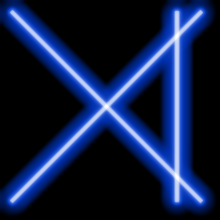

In [14]:
# generate some lines
xys = [(10,10,200,200), (175,10,175,200), (200,10,10,200)]  
weights = np.array([ 2,1,.7])/100  # some weights
# create the image_data
new_image_data = add_lines(np.zeros((220,220)),
                           xys,
                           width=4,
                           weights=weights)
# show the image
Image.fromarray(to_image(new_image_data),mode="RGBA")

In [15]:
min_lat = 30.02893343
max_lat = 30.50773438
max_lon = -97.4414583
min_lon = -97.93145895



def latlon_to_pixel(lat, lon, image_shape):
    # longitude to pixel conversion (fit data to image)
    delta_x = image_shape[1]/(max_lon-min_lon)
    
    # latitude to pixel conversion (maintain aspect ratio)
    delta_y = delta_x/np.cos(lat/360*np.pi*2)
    pixel_y = (max_lat-lat)*delta_y
    pixel_x = (lon-min_lon)*delta_x
    return (pixel_y,pixel_x)


def row_to_pixel(row,image_shape):
    """
    convert a row (1 trip) to pixel coordinates
    of start and end point
    """
    start_y, start_x = latlon_to_pixel(row["Start Latitude"], 
                                       row["Start Longitude"], image_shape)
    end_y, end_x = latlon_to_pixel(row["End Latitude"], 
                                   row["End Longitude"], image_shape)
    xy = (start_x, start_y, end_x, end_y)
    return xy

In [16]:
mapDF.describe()

,Trip Duration,Trip Distance,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Start Latitude,Start Longitude,End Latitude,End Longitude
count,314258.0000,314258.0000,314258.0000,314258.0000,314258.0000,314258.0000,314258.0000,314258.0000,314258.0000,314258.0000,314258.0000,314258.0000
mean,5.9192,0.5776,2.0000,14.3415,3.1277,7.7994,7.7285,2019.0000,30.2742,-97.7407,30.2692,-97.7303
std,3.8701,0.4648,0.0000,5.1123,2.0151,2.5723,2.6465,0.0000,0.0188,0.0388,0.8708,1.1524
min,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,2019.0000,30.1370,-118.5880,-97.7490,-122.3580
25%,3.1167,0.2349,2.0000,11.0000,1.0000,9.0000,9.0000,2019.0000,30.2640,-97.7460,30.2640,-97.7450
50%,5.0333,0.4934,2.0000,15.0000,3.0000,9.0000,9.0000,2019.0000,30.2720,-97.7410,30.2720,-97.7410
75%,7.9167,0.8289,2.0000,18.0000,5.0000,9.0000,9.0000,2019.0000,30.2860,-97.7370,30.2860,-97.7370
max,17.8500,2.1779,2.0000,23.0000,6.0000,10.0000,10.0000,2019.0000,34.2660,-97.6020,48.8920,148.2310


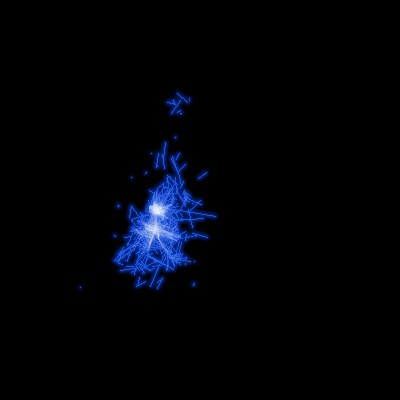

In [17]:
paths = mapDF[mapDF['Hour']== 12]
paths = paths.iloc[:5000,:]

# generate empty pixel array, choose your resolution
image_data = np.zeros((400,400))

# generate pixel coordinates of starting points and end points
xys = [row_to_pixel(row, image_data.shape) for i, row in paths.iterrows()]

# draw the lines
image_data = add_lines(image_data, xys, weights=None, width = 1)
Image.fromarray(to_image(image_data*10)[:,:,:3],mode="RGB")

In [18]:
def add_alpha(image_data):
    """
    Uses the Value in HSV as an alpha channel. 
    This creates an image that blends nicely with a black background.
    """
    
    # get hsv image
    hsv = rgb_to_hsv(image_data[:,:,:3].astype(float)/255)
    
    # create new image and set alpha channel
    new_image_data = np.zeros(image_data.shape)
    new_image_data[:,:,3] = hsv[:,:,2]
    
    # set value of hsv image to either 0 or 1.
    hsv[:,:,2] = np.where(hsv[:,:,2]>0, 1, 0)
    
    # combine alpha and new rgb
    new_image_data[:,:,:3] = hsv_to_rgb(hsv)
    return new_image_data

In [19]:
# create the map
folium_map = folium.Map(location=[30.2672, -97.7431],
                        zoom_start=13,
                        tiles="CartoDB dark_matter",
                        width='50%')

# create the overlay
map_overlay = add_alpha(to_image(image_data*10))

# compute extent of image in lat/lon
aspect_ratio = map_overlay.shape[1]/map_overlay.shape[0]
delta_lat = (max_lon-min_lon)/aspect_ratio*np.cos(min_lat/360*2*np.pi)

# add the image to the map
img = folium.raster_layers.ImageOverlay(map_overlay,
                           bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                           opacity = 1,
                           name = "Paths")

img.add_to(folium_map)
folium.LayerControl().add_to(folium_map)

# show the map
folium_map

In [20]:
def get_image_data(paths, min_count=0, max_count=None):
    # generate empty pixel array
    image_data = np.zeros((900*2,400*2))
    
    # generate pixel coordinates of starting points and end points
    if max_count is None:
        max_count = paths["Trip Duration"].max()+1
    selector = (paths["Trip Duration"]>= min_count) & (paths["Trip Duration"]< max_count)
    xys = [row_to_pixel(row, image_data.shape) for i, row in paths[selector].iterrows()]

    # draw the lines
    image_data = add_lines(image_data, xys, weights=paths["Trip Duration"], width = 1)
    return image_data

In [24]:
folium_map = folium.Map(location=[30.2672, -97.7431],
                        zoom_start=13,
                        tiles="CartoDB dark_matter",
                        width='50%')

thresholds = [0,5,10,15]

for i,t in enumerate(thresholds):
    upper = thresholds[i+1] if i<len(thresholds)-1 else None
    image_data = get_image_data(paths, t, upper)
    
    name = "{} < Min. Duration < {}".format(t,"max" if upper is None else upper)

    map_overlay = add_alpha(to_image(image_data*10))
    delta_lat = (max_lon-min_lon)/map_overlay.shape[1]*map_overlay.shape[0]*np.cos(min_lat/360*2*np.pi)
    img = folium.raster_layers.ImageOverlay(map_overlay,
                               bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                               name = name)

    img.add_to(folium_map)

lc = folium.LayerControl().add_to(folium_map)

folium_map

# Any Questions?